<a href="https://colab.research.google.com/github/gustavomachin/RendimientoAcademico/blob/main/notebooks/DA_Clasificacion_PyCaret_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Auto Machine Learning con PyCaret - Modelos de Clasificación**


## **Instalación y carga de bibliotecas necesarias**

### **Instalación de PyCaret**

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 2.6 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2


### **Instalación de Jinja2**

In [ ]:
!pip install -U Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


### **Habilitación Google Colab**

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


### **Carga de Jinja2**

In [ ]:
import jinja2

### **Carga del módulo de classification de PyCaret**



El módulo de clasificación de PyCaret es un módulo de aprendizaje automático supervisado. El objetivo es predecir las etiquetas de clase categóricas. Este módulo se puede utilizar para problemas binarios o multiclase. Proporciona varias funciones de preprocesamiento que preparan los datos para el modelado a través de la función de configuración. Tiene más de 15 algoritmos listos para usar y varios gráficos para analizar el rendimiento de los modelos entrenados.

In [ ]:
from pycaret.classification import *

### **Carga de Pandas**

In [ ]:
import pandas as pd

## **Conjunto de datos**

Se utilizará el conjunto de datos de los alumnos de la Facultad de Ciencias Económicas de la Universidad Nacional de Cuyo, en sus carreras principales: Contador Público Nacional y Perito Partidor, Licenciatura en Administración, Licenciatura en Economía y Licenciatura en Logística. La muestra está compuesta por 2891 alumnos (registros) que en 2020 se encuentraban cursando alguna de las carreras anteriormente mencionadas.

**Variables:** 

* **Desemp3NR:** combina la nota promedio obtenida por el alumno y la regularidad demostrada en los estudios (materias aprobadas por año). Se considerará éxito académico (1) cuando el indicador sea mayor o igual a 28 (7 de promedio y 4 materias aprobadas por año), clasificando los demás casos como fracaso académico (0). *Bartolomeo y Machín (2021); Porto y Di Gresia (2005)* 
* **Edad:** del alumno (numérica discreta).
* **CantidadHijos:** del alumno (numérica discreta).
* **Género:** este factor tiene dos niveles posibles (hombre o mujer).
* **Carrera:** este factor tiene cuatro niveles posibles: LE (Licenciatura en
Economía), LA (Licenciatura en Administración), CPN (Contador Público
Nacional y Perito Partidor) y LLO (Licenciatura en Logística).
* **Trabajo:** indica si el alumno se encuentra trabajando o no
* **Beca:** indica si el alumno tiene algún tipo de beca, ya sea del gobierno
(nacional, provincial o municipal) u otorgada por la propia universidad.
* **EstadoCivil:** este factor tiene tres categorías: soltero, casado y otro; esta última incluye separado, divorciado y viudo.



In [ ]:
data_url = "https://raw.githubusercontent.com/gustavomachin/RendimientoAcademico/main/AlumnosFCE_custom%20(2).csv"
data = pd.read_csv(data_url, index_col=0)
data.head()

Carrera  Edad Trabajo Beca Genero EstadoCivil  CantidadHijos  Prom_cAplazo  \
0     CPN    25       N    N      F     Soltero              0          6.66   
1      LA    25       S    N      M     Soltero              0          7.85   
2     CPN    26       N    S      M     Soltero              0          6.88   
3     CPN    24       N    S      F     Soltero              0          6.93   
4     CPN    25       S    N      F     Soltero              0          6.54   

        A/P  Desemp1R  Desemp2N  Desemp3RN  
0  4.571429         1         0          1  
1  5.142857         1         1          1  
2  3.428571         0         0          0  
3  3.428571         0         0          0  
4  5.142857         1         0          1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Carrera        2891 non-null   object 
 1   Edad           2891 non-null   int64  
 2   Trabajo        2891 non-null   object 
 3   Beca           2891 non-null   object 
 4   Genero         2891 non-null   object 
 5   EstadoCivil    2891 non-null   object 
 6   CantidadHijos  2891 non-null   int64  
 7   Prom_cAplazo   2891 non-null   float64
 8   A/P            2891 non-null   float64
 9   Desemp1R       2891 non-null   int64  
 10  Desemp2N       2891 non-null   int64  
 11  Desemp3RN      2891 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 293.6+ KB


### **Limpieza del data frame**

In [ ]:
data_C = data.drop(labels=['Prom_cAplazo','A/P', 'Desemp1R', 'Desemp2N'], axis=1)
data_C.head()

Carrera  Edad Trabajo Beca Genero EstadoCivil  CantidadHijos  Desemp3RN
0     CPN    25       N    N      F     Soltero              0          1
1      LA    25       S    N      M     Soltero              0          1
2     CPN    26       N    S      M     Soltero              0          0
3     CPN    24       N    S      F     Soltero              0          0
4     CPN    25       S    N      F     Soltero              0          1

In [ ]:
data_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Carrera        2891 non-null   object
 1   Edad           2891 non-null   int64 
 2   Trabajo        2891 non-null   object
 3   Beca           2891 non-null   object
 4   Genero         2891 non-null   object
 5   EstadoCivil    2891 non-null   object
 6   CantidadHijos  2891 non-null   int64 
 7   Desemp3RN      2891 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 203.3+ KB


In [ ]:
data_C.Desemp3RN.value_counts()

0    1746
1    1145
Name: Desemp3RN, dtype: int64

## **Configuración del entorno PyCaret**

La función `setup` inicializa el entorno de entrenamiento y crea el pipeline. Esta función debe llamarse antes de ejecutar cualquier otra función. Tiene dos parámetros obligatorios: datos y variable objetivo (target). Todos los demás parámetros son opcionales.

In [ ]:
clasificacion = setup(data_C, target = 'Desemp3RN', session_id = 123)

Description             Value
0                               session_id               123
1                                   Target         Desemp3RN
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (2891, 8)
5                           Missing Values             False
6                         Numeric Features                 1
7                     Categorical Features                 6
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (2023, 15)
12                    Transformed Test Set         (868, 15)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              40e9
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Desemp3RN',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

## **Todos los modelos de Clasificación**

In [ ]:
#models()

Esta función entrena todos los modelos de clasificación y los evalua usando validación cruzada. Muestra: Accuracy, AUC, Recall, Precision, F1, Kappa y los tiempos de entrenamiento. Esta evaluación es un buen punto de partida para el modelado. 

In [ ]:
compare_models(sort='F1')

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7044  0.7863  0.6612  0.6198   
ada                  Ada Boost Classifier    0.6866  0.7629  0.6613  0.5951   
nb                            Naive Bayes    0.5260  0.7378  0.9700  0.4537   
lightgbm  Light Gradient Boosting Machine    0.6891  0.7756  0.6312  0.6048   
rf               Random Forest Classifier    0.6876  0.7593  0.6188  0.6054   
lr                    Logistic Regression    0.6985  0.7626  0.5988  0.6244   
knn                K Neighbors Classifier    0.6861  0.7405  0.6100  0.6015   
dt               Decision Tree Classifier    0.6797  0.7451  0.5700  0.6046   
et                 Extra Trees Classifier    0.6782  0.7474  0.5675  0.6032   
lda          Linear Discriminant Analysis    0.6881  0.7576  0.5450  0.6202   
ridge                    Ridge Classifier    0.6876  0.0000  0.5412  0.6202   
svm                   SVM - Linear Kernel    0.6610  0.0000  0.6525  0.5765   
qda       Quadratic Discriminant Analysis    0.5230  0.5233  0.5250  0.3352   
dummy                    Dummy Classifier    0.6045  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.6385  0.3893  0.3911     0.149  
ada       0.6250  0.3575  0.3602     0.132  
nb        0.6181  0.1718  0.2786     0.017  
lightgbm  0.6162  0.3556  0.3571     0.129  
rf        0.6108  0.3504  0.3513     0.617  
lr        0.6105  0.3649  0.3657     0.485  
knn       0.6050  0.3448  0.3454     0.122  
dt        0.5848  0.3249  0.3268     0.018  
et        0.5830  0.3218  0.3236     0.500  
lda       0.5799  0.3336  0.3355     0.019  
ridge     0.5777  0.3318  0.3339     0.025  
svm       0.5769  0.3062  0.3323     0.052  
qda       0.3887  0.0407  0.0648     0.018  
dummy     0.0000  0.0000  0.0000     0.016

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

A continuación, se trabajarán con los modelos:

* Regresión Logística ('lr')
* Arboles de decisión ('dt')
* Bosques aleatorios ('rf')
* Bayes Ingenuo ('nb')
* K-vecinos ('knn')

## **Regresión logística**

### ***Creación del modelo***

La función `create_model` entrena y evalua el modelo seleccionado.

In [ ]:
lr_model = create_model('lr')
print(lr_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7044  0.7782  0.6500  0.6190  0.6341  0.3865  0.3868
1       0.7143  0.7543  0.6375  0.6375  0.6375  0.4017  0.4017
2       0.6798  0.7090  0.6125  0.5904  0.6012  0.3339  0.3340
3       0.6980  0.7813  0.5750  0.6301  0.6013  0.3591  0.3601
4       0.7079  0.7709  0.5500  0.6567  0.5986  0.3719  0.3755
5       0.7277  0.8048  0.6375  0.6623  0.6497  0.4271  0.4274
6       0.6683  0.7415  0.5250  0.5915  0.5563  0.2930  0.2943
7       0.7030  0.7704  0.5750  0.6389  0.6053  0.3682  0.3695
8       0.6931  0.7482  0.6250  0.6098  0.6173  0.3612  0.3612
9       0.6881  0.7673  0.6000  0.6076  0.6038  0.3466  0.3467
Mean    0.6985  0.7626  0.5988  0.6244  0.6105  0.3649  0.3657
Std     0.0163  0.0247  0.0393  0.0238  0.0249  0.0350  0.0349

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Cuando el modelo es creado usando la función `create_model` se usan los hiperparámetros por defecto para entrenar el modelo. La función `tune_model` ajusta dichos hiperparámetros con el objetivo de mejorar la calidad predictiva del modelo. 

In [ ]:
lr_tuned = tune_model(lr_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7044  0.7803  0.8375  0.5877  0.6907  0.4239  0.4485
1       0.6897  0.7548  0.7625  0.5810  0.6595  0.3838  0.3958
2       0.6700  0.7090  0.7625  0.5596  0.6455  0.3501  0.3648
3       0.7178  0.7863  0.8000  0.6095  0.6919  0.4403  0.4542
4       0.7079  0.7677  0.7750  0.6019  0.6776  0.4182  0.4294
5       0.7525  0.8050  0.7750  0.6596  0.7126  0.4977  0.5027
6       0.7327  0.7443  0.7875  0.6300  0.7000  0.4642  0.4737
7       0.6832  0.7675  0.7625  0.5755  0.6559  0.3728  0.3855
8       0.6980  0.7505  0.8000  0.5872  0.6772  0.4058  0.4231
9       0.7079  0.7712  0.8250  0.5946  0.6911  0.4276  0.4484
Mean    0.7064  0.7637  0.7887  0.5987  0.6802  0.4184  0.4326
Std     0.0227  0.0249  0.0253  0.0273  0.0201  0.0413  0.0398

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### ***Predicción con el modelo creado (entrenado)***

La función predict_model predice la variable objetivo usando el modelo entrenado y muestra la probabildiad de la clase elegida. 

In [ ]:
predict_model(lr_tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression     0.712  0.7568  0.8145  0.6017  0.6921  0.4328   

      MCC  
0  0.4504

Edad  Carrera_CPN  Carrera_LA  Carrera_LE  Carrera_LLO  Trabajo_S  \
0    33.0          1.0         0.0         0.0          0.0        1.0   
1    33.0          1.0         0.0         0.0          0.0        1.0   
2    42.0          1.0         0.0         0.0          0.0        1.0   
3    23.0          1.0         0.0         0.0          0.0        1.0   
4    28.0          1.0         0.0         0.0          0.0        0.0   
..    ...          ...         ...         ...          ...        ...   
863  28.0          0.0         1.0         0.0          0.0        1.0   
864  21.0          1.0         0.0         0.0          0.0        0.0   
865  38.0          0.0         1.0         0.0          0.0        1.0   
866  26.0          0.0         1.0         0.0          0.0        1.0   
867  30.0          1.0         0.0         0.0          0.0        1.0   

     Beca_S  Genero_M  EstadoCivil_Casado  EstadoCivil_Otro  \
0       0.0       1.0                 0.0               0.0   
1       0.0       0.0                 0.0               0.0   
2       0.0       0.0                 0.0               1.0   
3       0.0       0.0                 0.0               0.0   
4       0.0       0.0                 0.0               0.0   
..      ...       ...                 ...               ...   
863     0.0       0.0                 0.0               0.0   
864     0.0       0.0                 0.0               0.0   
865     0.0       1.0                 1.0               0.0   
866     0.0       1.0                 0.0               0.0   
867     0.0       0.0                 1.0               0.0   

     EstadoCivil_Soltero  CantidadHijos_0  CantidadHijos_1  CantidadHijos_2  \
0                    1.0              1.0              0.0              0.0   
1                    1.0              1.0              0.0              0.0   
2                    0.0              0.0              0.0              1.0   
3                    1.0              1.0              0.0              0.0   
4                    1.0              1.0              0.0              0.0   
..                   ...              ...              ...              ...   
863                  1.0              1.0              0.0              0.0   
864                  1.0              1.0              0.0              0.0   
865                  0.0              0.0              0.0              1.0   
866                  1.0              1.0              0.0              0.0   
867                  0.0              0.0              1.0              0.0   

     CantidadHijos_3  Desemp3RN  Label   Score  
0                0.0          0      0  0.9345  
1                0.0          0      0  0.9280  
2                0.0          0      0  0.9951  
3                0.0          0      1  0.5815  
4                0.0          0      0  0.7378  
..               ...        ...    ...     ...  
863              0.0          0      0  0.7061  
864              0.0          1      1  0.7281  
865              0.0          0      0  0.9855  
866              0.0          1      0  0.5990  
867              0.0          0      0  0.8881  

[868 rows x 18 columns]

### ***Evaluación del modelo (20 gráficos)***

Las funciones `evaluate_model` y `plot_model` realizan una evaluación del modelo creado mediante una serie de gráficos. Se puede utilizar para analizar diferentes aspectos del algoritmo de clasficación. 

In [ ]:
evaluate_model(lr_tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### **Visualización de las curvas ROC**

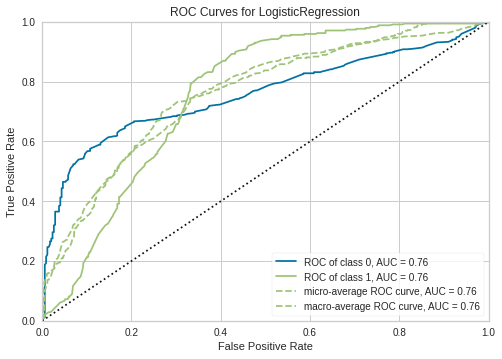

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lr_tuned)

#### **Visualización de la matriz de confusión**

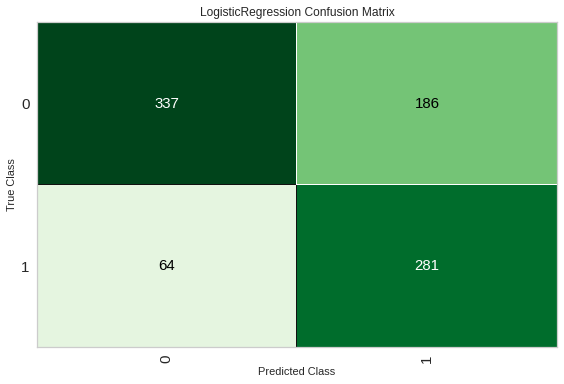

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lr_tuned, plot = 'confusion_matrix')

#### **Visualizacion de las variables explicativas**

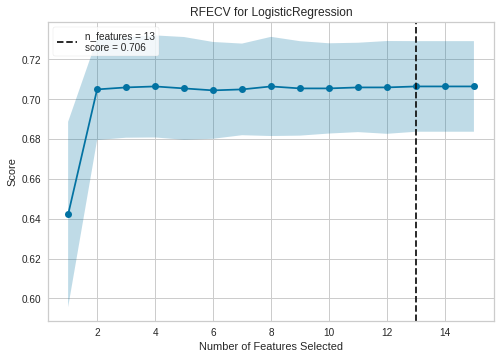

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lr_tuned, plot = 'rfe')

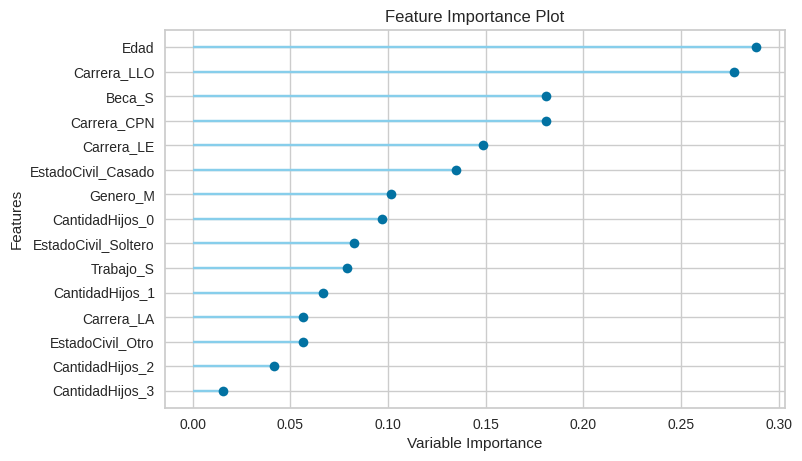

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lr_tuned, plot = 'feature_all')

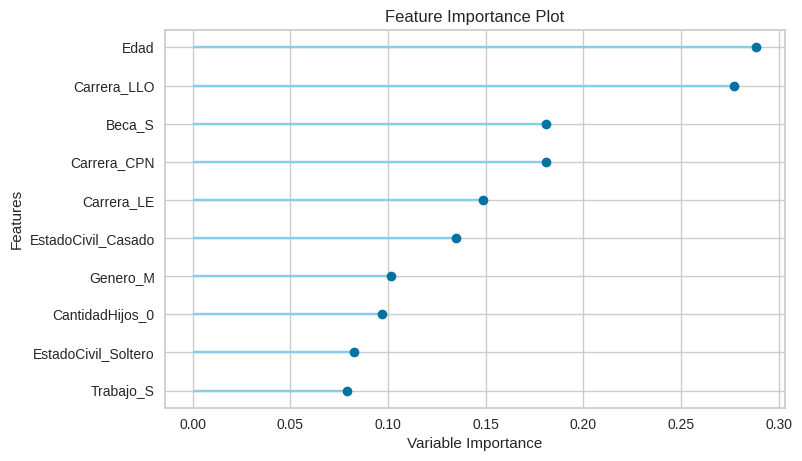

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lr_tuned, plot = 'feature')

## **Arbol de decisión**

### ***Creación del modelo***

In [ ]:
dt_model = create_model('dt')
print(dt_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6749  0.7286  0.5875  0.5875  0.5875  0.3192  0.3192
1       0.6552  0.7168  0.6125  0.5568  0.5833  0.2904  0.2913
2       0.6453  0.6983  0.6250  0.5435  0.5814  0.2763  0.2783
3       0.6733  0.7376  0.5750  0.5897  0.5823  0.3141  0.3141
4       0.6386  0.7508  0.5250  0.5455  0.5350  0.2397  0.2398
5       0.7228  0.8040  0.5625  0.6818  0.6164  0.4025  0.4071
6       0.7228  0.8054  0.5625  0.6818  0.6164  0.4025  0.4071
7       0.6782  0.7107  0.4875  0.6190  0.5455  0.3018  0.3070
8       0.7129  0.7605  0.6000  0.6486  0.6234  0.3919  0.3927
9       0.6733  0.7385  0.5625  0.5921  0.5769  0.3111  0.3114
Mean    0.6797  0.7451  0.5700  0.6046  0.5848  0.3249  0.3268
Std     0.0290  0.0345  0.0388  0.0493  0.0276  0.0531  0.0541

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
dt_tuned = tune_model(dt_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7143  0.7773  0.7000  0.6222  0.6588  0.4145  0.4166
1       0.7143  0.7628  0.6625  0.6310  0.6463  0.4069  0.4073
2       0.7094  0.7289  0.6750  0.6207  0.6467  0.4006  0.4016
3       0.6980  0.7832  0.6625  0.6092  0.6347  0.3781  0.3791
4       0.6832  0.7849  0.5375  0.6143  0.5733  0.3231  0.3250
5       0.7525  0.8325  0.5875  0.7344  0.6528  0.4641  0.4711
6       0.7376  0.8151  0.5875  0.7015  0.6395  0.4358  0.4400
7       0.6931  0.7506  0.6000  0.6154  0.6076  0.3556  0.3557
8       0.7030  0.7913  0.7375  0.6020  0.6629  0.4022  0.4089
9       0.6931  0.7877  0.6250  0.6098  0.6173  0.3612  0.3612
Mean    0.7098  0.7814  0.6375  0.6360  0.6340  0.3942  0.3966
Std     0.0202  0.0282  0.0576  0.0423  0.0261  0.0390  0.0406

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


### ***Predicción con el modelo creado (entrenado)***

In [ ]:
predict_model(dt_tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Decision Tree Classifier    0.7062  0.7791  0.7275  0.6092  0.6631  0.4063   

      MCC  
0  0.4113

Edad  Carrera_CPN  Carrera_LA  Carrera_LE  Carrera_LLO  Trabajo_S  \
0    33.0          1.0         0.0         0.0          0.0        1.0   
1    33.0          1.0         0.0         0.0          0.0        1.0   
2    42.0          1.0         0.0         0.0          0.0        1.0   
3    23.0          1.0         0.0         0.0          0.0        1.0   
4    28.0          1.0         0.0         0.0          0.0        0.0   
..    ...          ...         ...         ...          ...        ...   
863  28.0          0.0         1.0         0.0          0.0        1.0   
864  21.0          1.0         0.0         0.0          0.0        0.0   
865  38.0          0.0         1.0         0.0          0.0        1.0   
866  26.0          0.0         1.0         0.0          0.0        1.0   
867  30.0          1.0         0.0         0.0          0.0        1.0   

     Beca_S  Genero_M  EstadoCivil_Casado  EstadoCivil_Otro  \
0       0.0       1.0                 0.0               0.0   
1       0.0       0.0                 0.0               0.0   
2       0.0       0.0                 0.0               1.0   
3       0.0       0.0                 0.0               0.0   
4       0.0       0.0                 0.0               0.0   
..      ...       ...                 ...               ...   
863     0.0       0.0                 0.0               0.0   
864     0.0       0.0                 0.0               0.0   
865     0.0       1.0                 1.0               0.0   
866     0.0       1.0                 0.0               0.0   
867     0.0       0.0                 1.0               0.0   

     EstadoCivil_Soltero  CantidadHijos_0  CantidadHijos_1  CantidadHijos_2  \
0                    1.0              1.0              0.0              0.0   
1                    1.0              1.0              0.0              0.0   
2                    0.0              0.0              0.0              1.0   
3                    1.0              1.0              0.0              0.0   
4                    1.0              1.0              0.0              0.0   
..                   ...              ...              ...              ...   
863                  1.0              1.0              0.0              0.0   
864                  1.0              1.0              0.0              0.0   
865                  0.0              0.0              0.0              1.0   
866                  1.0              1.0              0.0              0.0   
867                  0.0              0.0              1.0              0.0   

     CantidadHijos_3  Desemp3RN  Label   Score  
0                0.0          0      0  0.9669  
1                0.0          0      0  0.9669  
2                0.0          0      0  0.9669  
3                0.0          0      1  0.5278  
4                0.0          0      0  0.9669  
..               ...        ...    ...     ...  
863              0.0          0      0  0.7385  
864              0.0          1      1  0.7284  
865              0.0          0      0  0.9596  
866              0.0          1      1  0.8182  
867              0.0          0      0  0.9669  

[868 rows x 18 columns]

### ***Evaluación del modelo (20 gráficos)***



In [ ]:
evaluate_model(dt_tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### ***Visualización del Modelo***

#### **Visualización de las curvas ROC**

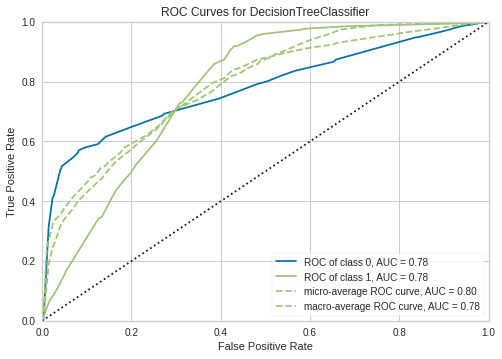

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(dt_tuned)

#### **Visualización de la matriz de confusión**

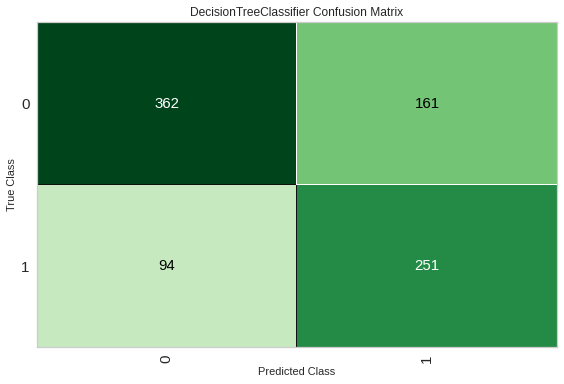

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(dt_tuned, plot = 'confusion_matrix')

#### **Visualizacion de las variables explicativas**

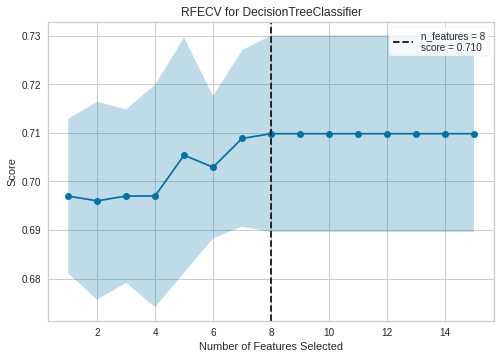

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(dt_tuned, plot = 'rfe')

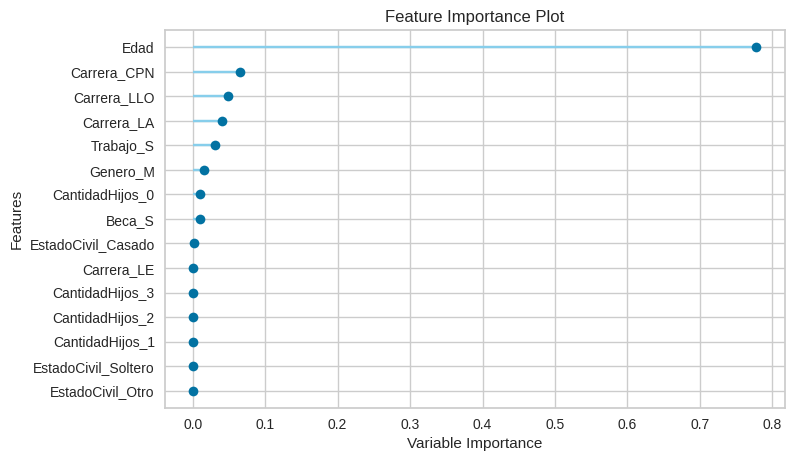

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(dt_tuned, plot = 'feature_all')

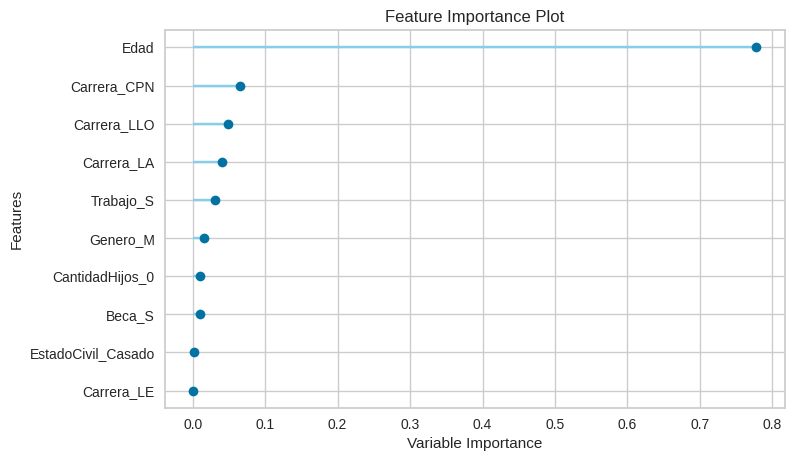

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(dt_tuned, plot = 'feature')

#### **Visualizacion del árbol**

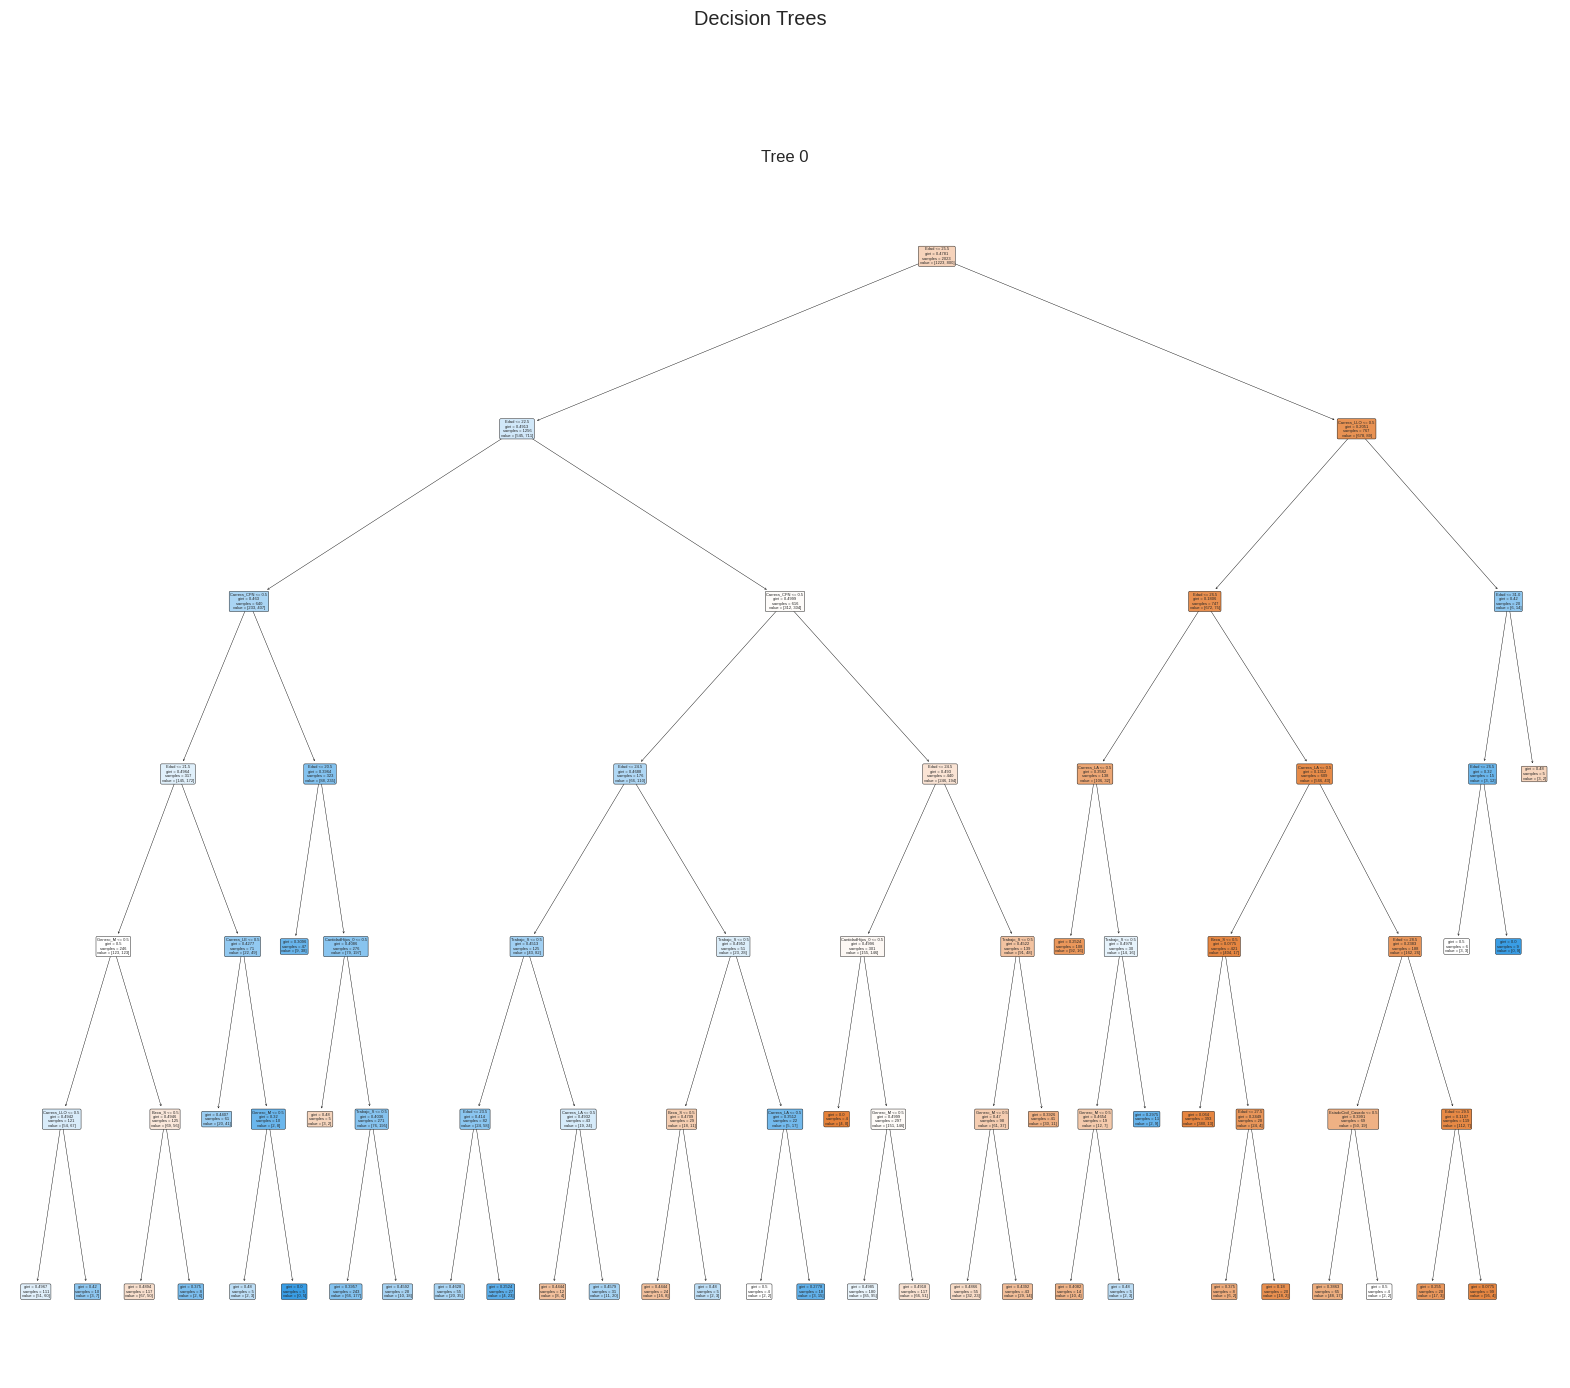

In [ ]:
plot_model(dt_tuned, plot='tree')

### ***Arbol de decisión con profundidad = 3***

In [ ]:
dt_model2 = create_model('dt', max_depth = 3)
print(dt_model2)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6798  0.7561  0.6500  0.5843  0.6154  0.3425  0.3439
1       0.6995  0.7295  0.7125  0.6000  0.6514  0.3908  0.3952
2       0.6601  0.7278  0.6375  0.5604  0.5965  0.3050  0.3069
3       0.7228  0.7816  0.8125  0.6132  0.6989  0.4512  0.4666
4       0.7129  0.7803  0.8250  0.6000  0.6947  0.4362  0.4560
5       0.7426  0.8122  0.7125  0.6628  0.6867  0.4687  0.4696
6       0.7129  0.7837  0.7125  0.6196  0.6628  0.4149  0.4180
7       0.6931  0.7367  0.6250  0.6098  0.6173  0.3612  0.3612
8       0.7030  0.7514  0.8500  0.5862  0.6939  0.4237  0.4516
9       0.7079  0.7720  0.6125  0.6364  0.6242  0.3855  0.3857
Mean    0.7034  0.7631  0.7150  0.6073  0.6542  0.3980  0.4055
Std     0.0216  0.0261  0.0829  0.0272  0.0367  0.0485  0.0535

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 9
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
evaluate_model(dt_model2)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Bosque aleatorio**

### ***Creación del modelo***

In [ ]:
rf_model = create_model('rf')
print(rf_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6700  0.7293  0.6250  0.5747  0.5988  0.3193  0.3201
1       0.6601  0.7309  0.6375  0.5604  0.5965  0.3050  0.3069
2       0.6453  0.7041  0.6375  0.5426  0.5862  0.2794  0.2821
3       0.7030  0.7758  0.6500  0.6190  0.6341  0.3844  0.3847
4       0.6634  0.7744  0.5625  0.5769  0.5696  0.2933  0.2933
5       0.7178  0.8216  0.6000  0.6575  0.6275  0.4011  0.4022
6       0.7327  0.8097  0.6125  0.6806  0.6447  0.4314  0.4329
7       0.6931  0.7285  0.5875  0.6184  0.6026  0.3528  0.3531
8       0.7129  0.7834  0.6375  0.6375  0.6375  0.3998  0.3998
9       0.6782  0.7351  0.6375  0.5862  0.6108  0.3373  0.3382
Mean    0.6876  0.7593  0.6188  0.6054  0.6108  0.3504  0.3513
Std     0.0272  0.0371  0.0264  0.0422  0.0232  0.0492  0.0490

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
rf_tuned = tune_model(rf_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6995  0.7723  0.7500  0.5941  0.6630  0.3984  0.4072
1       0.6847  0.7638  0.6375  0.5930  0.6145  0.3484  0.3490
2       0.7094  0.7356  0.7000  0.6154  0.6550  0.4057  0.4082
3       0.6931  0.7745  0.6625  0.6023  0.6310  0.3693  0.3705
4       0.6980  0.8025  0.6125  0.6203  0.6164  0.3674  0.3674
5       0.7178  0.8180  0.5750  0.6667  0.6174  0.3958  0.3986
6       0.6881  0.8142  0.6375  0.6000  0.6182  0.3550  0.3555
7       0.6782  0.7350  0.5875  0.5949  0.5912  0.3259  0.3259
8       0.7178  0.8234  0.8000  0.6095  0.6919  0.4403  0.4542
9       0.6931  0.7851  0.6375  0.6071  0.6220  0.3639  0.3642
Mean    0.6980  0.7824  0.6600  0.6103  0.6320  0.3770  0.3801
Std     0.0128  0.0305  0.0675  0.0207  0.0279  0.0314  0.0352

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### ***Predicción con el modelo creado (entrenado)***

In [ ]:
predict_model(rf_tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.7005  0.7807  0.7275  0.6019  0.6588  0.3961   

      MCC  
0  0.4017

Edad  Carrera_CPN  Carrera_LA  Carrera_LE  Carrera_LLO  Trabajo_S  \
0    33.0          1.0         0.0         0.0          0.0        1.0   
1    33.0          1.0         0.0         0.0          0.0        1.0   
2    42.0          1.0         0.0         0.0          0.0        1.0   
3    23.0          1.0         0.0         0.0          0.0        1.0   
4    28.0          1.0         0.0         0.0          0.0        0.0   
..    ...          ...         ...         ...          ...        ...   
863  28.0          0.0         1.0         0.0          0.0        1.0   
864  21.0          1.0         0.0         0.0          0.0        0.0   
865  38.0          0.0         1.0         0.0          0.0        1.0   
866  26.0          0.0         1.0         0.0          0.0        1.0   
867  30.0          1.0         0.0         0.0          0.0        1.0   

     Beca_S  Genero_M  EstadoCivil_Casado  EstadoCivil_Otro  \
0       0.0       1.0                 0.0               0.0   
1       0.0       0.0                 0.0               0.0   
2       0.0       0.0                 0.0               1.0   
3       0.0       0.0                 0.0               0.0   
4       0.0       0.0                 0.0               0.0   
..      ...       ...                 ...               ...   
863     0.0       0.0                 0.0               0.0   
864     0.0       0.0                 0.0               0.0   
865     0.0       1.0                 1.0               0.0   
866     0.0       1.0                 0.0               0.0   
867     0.0       0.0                 1.0               0.0   

     EstadoCivil_Soltero  CantidadHijos_0  CantidadHijos_1  CantidadHijos_2  \
0                    1.0              1.0              0.0              0.0   
1                    1.0              1.0              0.0              0.0   
2                    0.0              0.0              0.0              1.0   
3                    1.0              1.0              0.0              0.0   
4                    1.0              1.0              0.0              0.0   
..                   ...              ...              ...              ...   
863                  1.0              1.0              0.0              0.0   
864                  1.0              1.0              0.0              0.0   
865                  0.0              0.0              0.0              1.0   
866                  1.0              1.0              0.0              0.0   
867                  0.0              0.0              1.0              0.0   

     CantidadHijos_3  Desemp3RN  Label   Score  
0                0.0          0      0  0.9865  
1                0.0          0      0  0.9865  
2                0.0          0      0  0.9865  
3                0.0          0      1  0.5220  
4                0.0          0      0  0.9706  
..               ...        ...    ...     ...  
863              0.0          0      0  0.7748  
864              0.0          1      1  0.7196  
865              0.0          0      0  1.0000  
866              0.0          1      1  0.5152  
867              0.0          0      0  0.9865  

[868 rows x 18 columns]

### ***Evaluación del modelo (20 gráficos)***



In [ ]:
evaluate_model(rf_tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Bayes ingenuo**

### ***Creación del modelo***

In [ ]:
nb_model = create_model('nb')
print(nb_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.4926  0.7146  0.9750  0.4358  0.6023  0.1265  0.2329
1       0.5222  0.7032  0.9500  0.4497  0.6104  0.1623  0.2537
2       0.5222  0.6971  0.9750  0.4509  0.6166  0.1684  0.2790
3       0.5198  0.7486  0.9875  0.4514  0.6196  0.1666  0.2883
4       0.5248  0.7444  0.9750  0.4535  0.6190  0.1707  0.2813
5       0.5248  0.7706  0.9750  0.4535  0.6190  0.1707  0.2813
6       0.5446  0.7490  0.9625  0.4639  0.6260  0.1966  0.2978
7       0.5347  0.7599  0.9875  0.4593  0.6270  0.1880  0.3097
8       0.5446  0.7227  0.9500  0.4634  0.6230  0.1937  0.2862
9       0.5297  0.7684  0.9625  0.4556  0.6185  0.1749  0.2757
Mean    0.5260  0.7378  0.9700  0.4537  0.6181  0.1718  0.2786
Std     0.0140  0.0253  0.0127  0.0076  0.0069  0.0188  0.0205

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 13
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


GaussianNB(priors=None, var_smoothing=1e-09)


In [ ]:
nb_tuned = tune_model(nb_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7241  0.7769  0.7125  0.6333  0.6706  0.4347  0.4369
1       0.6946  0.7534  0.6500  0.6047  0.6265  0.3687  0.3694
2       0.6798  0.7181  0.6875  0.5789  0.6286  0.3508  0.3548
3       0.7079  0.7806  0.6500  0.6265  0.6380  0.3934  0.3935
4       0.7228  0.7582  0.6375  0.6538  0.6456  0.4180  0.4181
5       0.7277  0.8030  0.6625  0.6543  0.6584  0.4321  0.4321
6       0.6782  0.7471  0.6000  0.5926  0.5963  0.3288  0.3288
7       0.6931  0.7600  0.6625  0.6023  0.6310  0.3693  0.3705
8       0.6832  0.7500  0.6750  0.5870  0.6279  0.3544  0.3570
9       0.6980  0.7732  0.6875  0.6044  0.6433  0.3833  0.3857
Mean    0.7009  0.7621  0.6625  0.6138  0.6366  0.3833  0.3847
Std     0.0178  0.0218  0.0296  0.0255  0.0191  0.0341  0.0337

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 14
INFO:logs:GaussianNB(priors=None, var_smoothing=1)
INFO:logs:tune_model() succesfully completed......................................


### ***Predicción con el modelo creado (entrenado)***

In [ ]:
predict_model(nb_tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GaussianNB(priors=None, var_smoothing=1), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy    AUC  Recall   Prec.      F1   Kappa    MCC
0  Naive Bayes    0.6763  0.753  0.6406  0.5847  0.6113  0.3349  0.336

Edad  Carrera_CPN  Carrera_LA  Carrera_LE  Carrera_LLO  Trabajo_S  \
0    33.0          1.0         0.0         0.0          0.0        1.0   
1    33.0          1.0         0.0         0.0          0.0        1.0   
2    42.0          1.0         0.0         0.0          0.0        1.0   
3    23.0          1.0         0.0         0.0          0.0        1.0   
4    28.0          1.0         0.0         0.0          0.0        0.0   
..    ...          ...         ...         ...          ...        ...   
863  28.0          0.0         1.0         0.0          0.0        1.0   
864  21.0          1.0         0.0         0.0          0.0        0.0   
865  38.0          0.0         1.0         0.0          0.0        1.0   
866  26.0          0.0         1.0         0.0          0.0        1.0   
867  30.0          1.0         0.0         0.0          0.0        1.0   

     Beca_S  Genero_M  EstadoCivil_Casado  EstadoCivil_Otro  \
0       0.0       1.0                 0.0               0.0   
1       0.0       0.0                 0.0               0.0   
2       0.0       0.0                 0.0               1.0   
3       0.0       0.0                 0.0               0.0   
4       0.0       0.0                 0.0               0.0   
..      ...       ...                 ...               ...   
863     0.0       0.0                 0.0               0.0   
864     0.0       0.0                 0.0               0.0   
865     0.0       1.0                 1.0               0.0   
866     0.0       1.0                 0.0               0.0   
867     0.0       0.0                 1.0               0.0   

     EstadoCivil_Soltero  CantidadHijos_0  CantidadHijos_1  CantidadHijos_2  \
0                    1.0              1.0              0.0              0.0   
1                    1.0              1.0              0.0              0.0   
2                    0.0              0.0              0.0              1.0   
3                    1.0              1.0              0.0              0.0   
4                    1.0              1.0              0.0              0.0   
..                   ...              ...              ...              ...   
863                  1.0              1.0              0.0              0.0   
864                  1.0              1.0              0.0              0.0   
865                  0.0              0.0              0.0              1.0   
866                  1.0              1.0              0.0              0.0   
867                  0.0              0.0              1.0              0.0   

     CantidadHijos_3  Desemp3RN  Label   Score  
0                0.0          0      0  0.8011  
1                0.0          0      0  0.8011  
2                0.0          0      0  0.9789  
3                0.0          0      1  0.5044  
4                0.0          0      0  0.6246  
..               ...        ...    ...     ...  
863              0.0          0      0  0.6255  
864              0.0          1      1  0.5362  
865              0.0          0      0  0.9319  
866              0.0          1      0  0.5641  
867              0.0          0      0  0.6985  

[868 rows x 18 columns]

### ***Evaluación del modelo (20 gráficos)***



In [ ]:
evaluate_model(nb_tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=1), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **K vecinos cercanos**

### ***Creación del modelo***

In [ ]:
knn_model = create_model('knn')
print(knn_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7094  0.7512  0.6625  0.6235  0.6424  0.3980  0.3985
1       0.6995  0.7318  0.6125  0.6203  0.6164  0.3694  0.3694
2       0.5911  0.6543  0.4875  0.4815  0.4845  0.1457  0.1457
3       0.6980  0.7409  0.6250  0.6173  0.6211  0.3701  0.3701
4       0.6535  0.7514  0.4875  0.5735  0.5270  0.2564  0.2585
5       0.7376  0.8070  0.6375  0.6800  0.6581  0.4456  0.4462
6       0.7079  0.7510  0.6750  0.6207  0.6467  0.3985  0.3995
7       0.6782  0.7360  0.6250  0.5882  0.6061  0.3345  0.3350
8       0.7178  0.7735  0.6875  0.6322  0.6587  0.4189  0.4200
9       0.6683  0.7079  0.6000  0.5783  0.5890  0.3111  0.3113
Mean    0.6861  0.7405  0.6100  0.6015  0.6050  0.3448  0.3454
Std     0.0393  0.0380  0.0666  0.0495  0.0549  0.0844  0.0845

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 16
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
knn_tuned = tune_model(knn_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7291  0.7959  0.7250  0.6374  0.6784  0.4460  0.4488
1       0.7094  0.7717  0.6875  0.6180  0.6509  0.4031  0.4048
2       0.6897  0.7517  0.6625  0.5955  0.6272  0.3627  0.3642
3       0.7129  0.7863  0.6500  0.6341  0.6420  0.4024  0.4025
4       0.7079  0.7995  0.6000  0.6400  0.6194  0.3828  0.3833
5       0.7277  0.8400  0.5750  0.6866  0.6259  0.4145  0.4185
6       0.7426  0.8143  0.6625  0.6795  0.6709  0.4596  0.4597
7       0.6782  0.7510  0.5875  0.5949  0.5912  0.3259  0.3259
8       0.7277  0.8106  0.7500  0.6316  0.6857  0.4486  0.4538
9       0.6931  0.7803  0.7000  0.5957  0.6437  0.3772  0.3809
Mean    0.7118  0.7901  0.6600  0.6313  0.6435  0.4023  0.4042
Std     0.0193  0.0266  0.0556  0.0309  0.0277  0.0399  0.0405

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 17
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


### ***Predicción con el modelo creado (entrenado)***

In [ ]:
predict_model(knn_tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  K Neighbors Classifier    0.6866  0.7694   0.658  0.5958  0.6253  0.3572   

      MCC  
0  0.3585

Edad  Carrera_CPN  Carrera_LA  Carrera_LE  Carrera_LLO  Trabajo_S  \
0    33.0          1.0         0.0         0.0          0.0        1.0   
1    33.0          1.0         0.0         0.0          0.0        1.0   
2    42.0          1.0         0.0         0.0          0.0        1.0   
3    23.0          1.0         0.0         0.0          0.0        1.0   
4    28.0          1.0         0.0         0.0          0.0        0.0   
..    ...          ...         ...         ...          ...        ...   
863  28.0          0.0         1.0         0.0          0.0        1.0   
864  21.0          1.0         0.0         0.0          0.0        0.0   
865  38.0          0.0         1.0         0.0          0.0        1.0   
866  26.0          0.0         1.0         0.0          0.0        1.0   
867  30.0          1.0         0.0         0.0          0.0        1.0   

     Beca_S  Genero_M  EstadoCivil_Casado  EstadoCivil_Otro  \
0       0.0       1.0                 0.0               0.0   
1       0.0       0.0                 0.0               0.0   
2       0.0       0.0                 0.0               1.0   
3       0.0       0.0                 0.0               0.0   
4       0.0       0.0                 0.0               0.0   
..      ...       ...                 ...               ...   
863     0.0       0.0                 0.0               0.0   
864     0.0       0.0                 0.0               0.0   
865     0.0       1.0                 1.0               0.0   
866     0.0       1.0                 0.0               0.0   
867     0.0       0.0                 1.0               0.0   

     EstadoCivil_Soltero  CantidadHijos_0  CantidadHijos_1  CantidadHijos_2  \
0                    1.0              1.0              0.0              0.0   
1                    1.0              1.0              0.0              0.0   
2                    0.0              0.0              0.0              1.0   
3                    1.0              1.0              0.0              0.0   
4                    1.0              1.0              0.0              0.0   
..                   ...              ...              ...              ...   
863                  1.0              1.0              0.0              0.0   
864                  1.0              1.0              0.0              0.0   
865                  0.0              0.0              0.0              1.0   
866                  1.0              1.0              0.0              0.0   
867                  0.0              0.0              1.0              0.0   

     CantidadHijos_3  Desemp3RN  Label   Score  
0                0.0          0      0  0.9388  
1                0.0          0      0  0.9592  
2                0.0          0      0  0.9796  
3                0.0          0      1  0.5918  
4                0.0          0      0  0.9796  
..               ...        ...    ...     ...  
863              0.0          0      0  0.7551  
864              0.0          1      1  0.7551  
865              0.0          0      0  1.0000  
866              0.0          1      1  0.5918  
867              0.0          0      0  0.9388  

[868 rows x 18 columns]

### ***Evaluación del modelo (20 gráficos)***



In [ ]:
evaluate_model(knn_tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…